# Arnoldova mačka

## Uvod

Diskretni dinamički sustav je uređeni par $(X,f)$ nepraznog prostora $X$ i preslikavanja $f:X\rightarrow X$. U dinamičkim sustavima proučavamo dugoročno ponašanje točaka iz $X$ pod iteracijama od $f$.
U ovom eseju bavit ćemo se dinamičkim sustavom pod nazivom _Arnoldova mačka_. Prvo ćemo definirati potrebne pojmove torusa, hiperboličkog automorfizma i Markovljeve particije te na kraju vidjeti zašto nam je sve to potrebno za opis _Arnoldove mačke_.

#### Definicija 1.
Torus $\mathbb{T}^2$ definirat ćemo pomoću relacije ekvivalencije na $\mathbb{R}^2$: $(x,y)$ ~ $(u,v)$ ako i samo ako $x-u, y-v \in\mathbb{Z}$. Lako se vidi da je to relacija ekvivalencije. Sada torus definiramo kao skup svih klasa ekvivalencije za tu relaciju, $\mathbb{T}^2=\mathbb{R}^2/_{\mathbb{Z}^2}$.

Prikažimo klasu ekvivalencije proizvoljne točke iz $\mathbb{R}^2$.

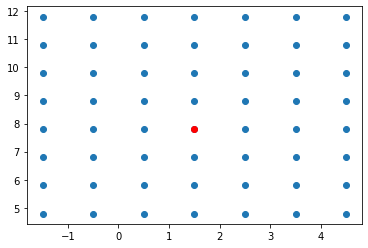

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

def prikazi_klasu(x,y):
    points=list(product(np.arange(x-3, x+4), (np.arange(y-3, y+4))))
    x_list, y_list=zip(*points)
    plt.scatter(x_list, y_list)
    plt.plot(x,y, color="red", marker="o")

#npr. za (x,y)=(1.5, 7.8)
prikazi_klasu(1.5, 7.8)

Kako iz gornje definicije dobivamo torus?

Primijetimo prvo da je za $\mathbb{R}^2/_{\mathbb{Z}^2}$ dovoljno gledati pravokutnik $[0,1]$ x $[0,1]$ jer svaku točku izvan pravokutnika možemo identificirati s nekom točkom unutar njega. Također, vertikalne stranice pravokutnika su identificirane pa dobivamo valjak (bez baza), a jer su horizontalne stranice isto identificirane dobivamo torus. Pogledajmo ovaj postupak na sljedećoj slici.

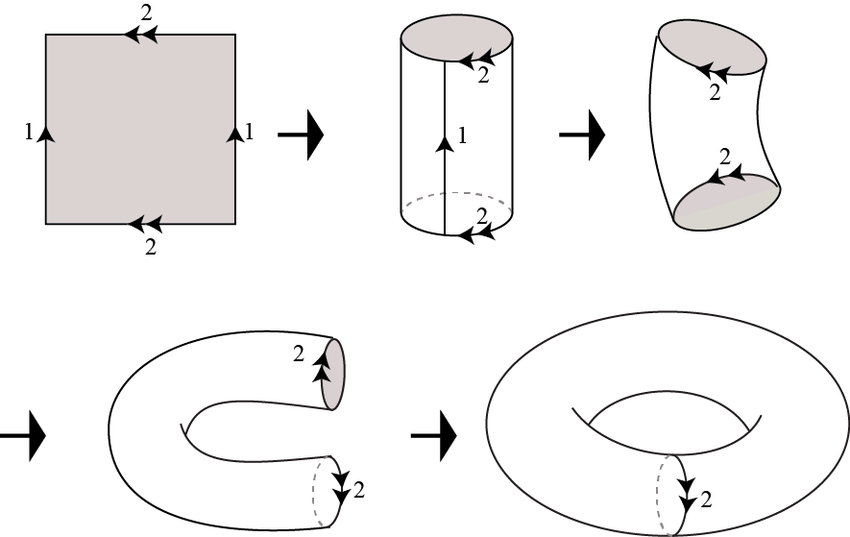

In [59]:
from IPython.core.display import Image, display

website = 'https://www.researchgate.net/profile/Sophia_Potoczak/publication/304126129/figure/fig6/AS:380419355758594@1467710450215/The-construction-of-a-torus-from-the-unit-square.png'
display(Image(website, width=700, unconfined=True))

U nastavku će nam biti bitno da dobro razumijemo kako se (proizvoljni) pravokutnici projiciraju na torus. Slijedi kod s funkcijama pomoću kojih ćemo vizualizirati tu projekciju.

In [60]:
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
import math

#funkcija prima koordinate donjeg lijevog kuta pravokutnka (x,y) te širinu i visinu pravokutnika
#vraća listu pravokutnika (tipa patches.Rectangle) projiciranih na torus
def projekcija (x, y, širina, visina):
    x=x%1
    y=y%1
    rect=[]
    
    if širina>=1 and visina>=1:
        return [patches.Rectangle((0,0), 1, 1)]
    elif širina>1:
        return projekcija(0, y, 1, visina)
    elif visina>1:
        return projekcija(x, 0, širina, 1)
    elif x+širina>1 and y+visina>1: 
        rect1=patches.Rectangle((x,y), 1-x, 1-y)
        rect2=patches.Rectangle((0,y), širina+x-1, 1-y)
        rect3=patches.Rectangle((x,0), 1-x, visina+y-1)
        rect4=patches.Rectangle((0,0), širina+x-1, visina+y-1)
        rect=rect+[rect1, rect2, rect3, rect4]
    elif x+širina>1:
        rect1=patches.Rectangle((x,y), 1-x, visina)
        rect2=patches.Rectangle((0,y), širina+x-1, visina)
        rect=rect+[rect1, rect2]
    elif y+širina>1:
        rect1=patches.Rectangle((x,y), širina, 1-y)
        rect2=patches.Rectangle((x,0), širina, visina+y-1)
        rect=rect+[rect1, rect2]
    else:
        return [patches.Rectangle((x,y),širina,visina)]
        
    return rect
    

#funkcija prima koordinate donjeg lijevog kuta pravokutnka (x,y) te širinu i visinu pravokutnika
#crta originalni i projicirani pravokutnik, koristeći funkciju 'projekcija'
def prikaži_projiciranje (x, y, širina, visina):
    fig, (ax1, ax2)=plt.subplots(1,2, figsize=(15, 7))
    
    raspon=širina if širina> visina else visina
    
    x_min=math.floor(x)
    x_max=math.ceil(x+raspon)
    y_min=math.floor(y)
    y_max=math.ceil(y+raspon)
    
    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(y_min, y_max)
    ax1.set_xticks(np.arange(x_min, x_max, 1))
    ax1.set_yticks(np.arange(y_min, y_max, 1))
    ax1.grid(which='major', alpha=0.7)
    ax1.set_title("Originalni pravokutnik", size=15)
    ax1.add_patch(patches.Rectangle((x,y), širina, visina, facecolor="green")) #originalni pravokutnik
    
    ax2.set_xlim(-1,2)
    ax2.set_ylim(-1,2)
    ax2.set_xticks(np.arange(-1, 2, 1))
    ax2.set_yticks(np.arange(-1, 2, 1))
    ax2.grid(which='major', alpha=0.7)
    ax2.set_title("Projekcija na torus", size=15)
    ax2.add_collection(PatchCollection(projekcija(x, y, širina, visina)))

Isprobajmo sada gornje funkcije na nekim pravokutnicima.

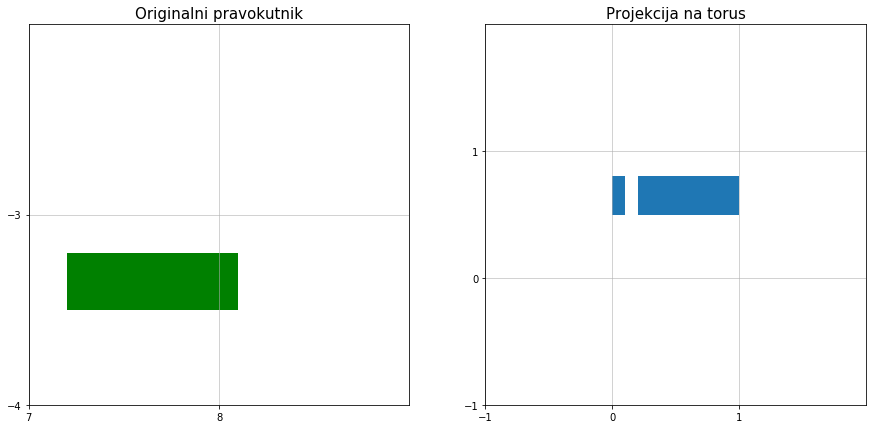

In [61]:
prikaži_projiciranje(7.2, -3.5, 0.9, 0.3)

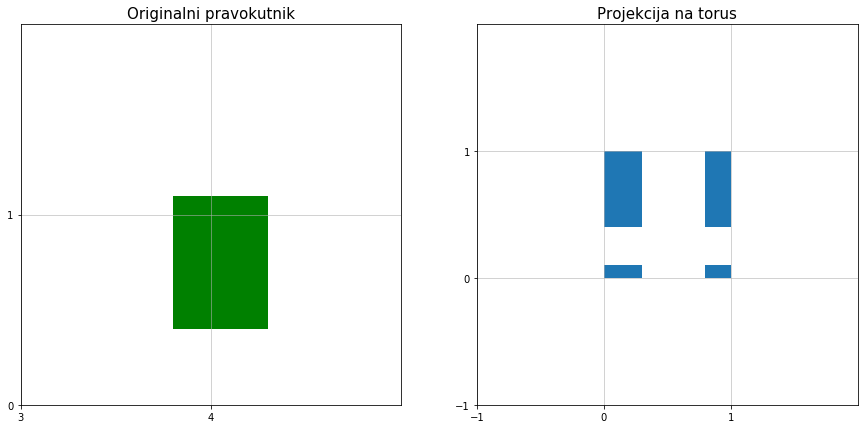

In [62]:
prikaži_projiciranje(3.8, 0.4, 0.5, 0.7)

#### Definicija 2.
Neka je $L(X)=AX$, gdje je $A=[a_{ij}]\in M_2$ matrica koja zadovoljava sljedeće uvjete:  
i) $a_{ij}\in\mathbb{Z}$, za svaki $i,j=1,2$,  
ii) $detA=\pm 1$,  
iii) $A$ je hiperbolična, odnosno sve njene svojstvene vrijednosti su apsolutne vrijednosti različite od 1.  
Preslikavanje na torusu inducirano matricom $A$ zove se __hiperbolički automorfizam torusa__ i označava s $L_A$.

#### Primjer 1. (Arnoldova mačka)
Neka je $L_A: \mathbb{T}^2 \rightarrow \mathbb{T}^2$ dano matricom $A=\begin{bmatrix}2&1\\1&1\end{bmatrix}$. Preslikavanje $L_A$ je primjer hiperboličkog automorfizma torusa i zove se Arnoldova mačka. Ime je dobilo po Vladimiru Arnoldu koji je 1960ih godina ilustrirao dinamiku tog preslikavanja koristeći sliku mačke.  
Na sljedećoj slici vidimo primjenu preslikavanja $L_A$ na sliku mačke, a u desnom donjem kutu slike vidimo kako se 'razvučena' slika identificira s jediničnim pravokutnikom.

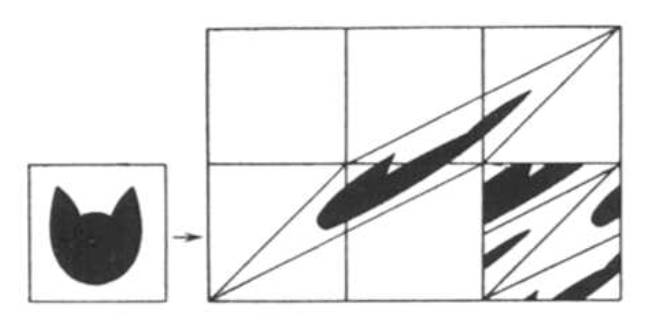

In [63]:
website = 'https://i.stack.imgur.com/Qm7p8.jpg'
display(Image(website, width=500, unconfined=True))

Na sljedećoj slici vidimo vidimo isto preslikavanje te je naglašeno kako se dijelovi koji su 'izašli' iz jediničnog pravokutnika identificiraju (projiciraju) unutar njega. Na slici su također dodani pravci ekspanzije i kontrakcije.  
Naime, svojstvene vrijednosti matrice $A$ su $\lambda_s=\frac{3-\sqrt{5}}{2}$ i $\lambda_u=\frac{3+\sqrt{5}}{2}$ te svojstveni vektori redom $y=\frac{\sqrt{5}-1}{2}x$ i $y=\frac{-\sqrt{5}-1}{2}x$. Dakle, točke na pravcu $y=\frac{\sqrt{5}-1}{2}x$ se preslikavaju na isti taj pravac, pri čemu se udaljavaju od 0 s koeficijentom $\lambda_u>1$. Iz tog razloga, pravac $y=\frac{\sqrt{5}-1}{2}x$ nazivamo pravcom _ekspanzije_.  
Analogno, točke na pravcu $y=\frac{-\sqrt{5}-1}{2}x$ preslikavaju se na isti pravac, ali pri tome se približavaju točki 0 s koeficijentom $\lambda_u$ ($0<\lambda_u<1$) te taj pravac nazivamo pravcom _kontrakcije_.  
Strelice na pravcima označavaju smjer 'kretanja' točaka na njima, prilikom preslikavanja.

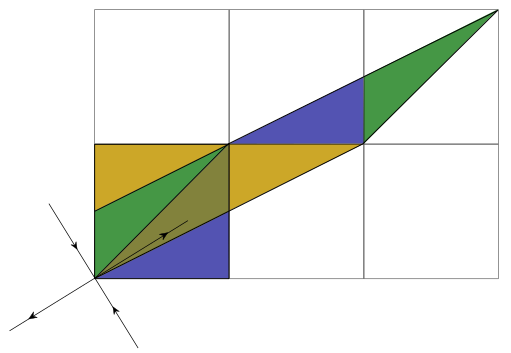

In [64]:
from IPython.display import SVG

website='https://upload.wikimedia.org/wikipedia/commons/a/ae/Arnoldcatmap.svg'
SVG(url=website)

Na sljedećoj slici možemo vidjeti koliko je preslikavanje $L_A$ komplicirano - već je nakon druge iteracije jako tešto pratiti gdje su se točke preslikale.

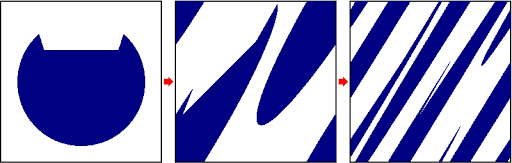

In [65]:
Image('macka.png')

Bez predubokog ulaženja u gradivo diskretnih dinamičkih sustava, radi spomenute kompleksnosti hiperboličkih automorfizama torusa ukazala se potreba da proučavamo kako se preslikavaju jednostavniji objekti - pravokutnici!  
Prisjetimo se pravaca kontrakcije i ekspanzije. Za sve točke na tim pravcima znamo da će ostati zauvijek na njima te točno u kojem smjeru će se _pomicati_. Dakle, ako imamo pravokutnik (u $\mathbb{T}^2$) kojemu su stranice na pravcima ekspanzije i kontrakcije (to je moguće jer se pravci projiciraju u torus), točno znamo što će se s njima dogoditi prilikom preslikavanja, odnosno u kojem smjeru će se pravokutnik ekspandirati, a u kojem kontrahirati. Ako bismo mogli naći skupinu takvih pravokutnika koji su međusobno disjunktni i zajedno prekrivaju cijeli torus, mogli bismo na jednak način opisati gibanje svake točke u torusu.  
Ovo motivira sljedeću definiciju:

#### Definicija 3.
__Markovljeva particija__ za $L_A$ je konačna familija pravokutnika $\{R_1, ..., R_n\}$ koja zadovoljava sljedeća svojstva:  
i) $\mathbb{T}^2=\cup_{i=1}^n R_i$  
ii) $IntR_i\cap IntR_j=\emptyset$, $\forall i\neq j$  
iii) Ako je $L_A(R_i)\cap IntR_j\neq\emptyset$, tada slika od $R_i$ prolazi kroz cijeli $R_j$ u smjeru ekspanzije te ako je $L_A^{-1}(R_j)\cap IntR_i\neq\emptyset$, tada praslika od $R_j$ prolazi kroz cijeli $R_i$ u smjeru kontrakcije.  

Iz gornjih svojstava slijedi da su za pravokutnike iz Markovljeve particije za $L_A$ dvije stranice uvijek u smjeru kontrakcije, a dvije u smjeru ekspanzije.   
Sljedeći kod je funkcija koja crta jednu Markovljevu particiju preslikavanja $L_A$ (ona nije jedinstvena). Plava linija je pravac ekspanzije, a crvena pravac kontrakcije. Imajmo na umu kako se pravokutnici projiciraju na torus (gore pokazano).

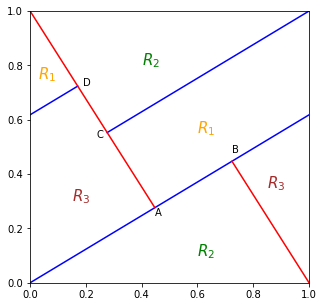

In [66]:
def particija_arnoldove_macke (ax, r_size, points_size):
    ax.margins(x=0, y=0)

    a=np.sqrt(5)
    
    #točke sjecišta pravaca (ujedno i vrhovi pravokutnika particije)
    A=[a/5, (5-a)/10]
    B=[(5+a)/10, a/5]
    C=[(5-a)/10, (5-a)/5]
    D=[(3*a-5)/10, (5+a)/10]

    #crtanje pravaca
    ax.plot([0,1], [0,(a-1)/2], color="blue")
    ax.plot([C[0], 1], [C[1], 1], color="blue")
    ax.plot([0, D[0]], [(a-1)/2, D[1]], color="blue")
    ax.plot([0, A[0]], [1, A[1]], color="red")
    ax.plot([1, B[0]], [0, B[1]], color="red")

    #označavanje točaka A, B, C i D
    ax.text(A[0], A[1]-0.03, 'A', size=points_size)
    ax.text(B[0], B[1]+0.03, 'B', size=points_size)
    ax.text(C[0]-0.04, C[1]-0.02, 'C', size=points_size)
    ax.text(D[0]+0.02, D[1], 'D', size=points_size)

    #označavanje pravokutnika particije
    ax.text(0.6, 0.55, r'$R_1$', size=r_size, color="orange")
    ax.text(0.03, 0.75, r'$R_1$', size=r_size, color="orange")
    ax.text(0.6, 0.1, r'$R_2$', size=r_size, color="green")
    ax.text(0.4, 0.8, r'$R_2$', size=r_size, color="green")
    ax.text(0.15, 0.3, r'$R_3$', size=r_size, color="brown")
    ax.text(0.85, 0.35, r'$R_3$', size=r_size, color="brown")
    

fig, ax = plt.subplots(figsize=(5,5))
particija_arnoldove_macke(ax, r_size=15, points_size=10)

Prikažimo sada sliku i prasliku ove particije pod $L_A$:

Text(0.02, 0.12, '$L_A^{-1}(R_3)$')

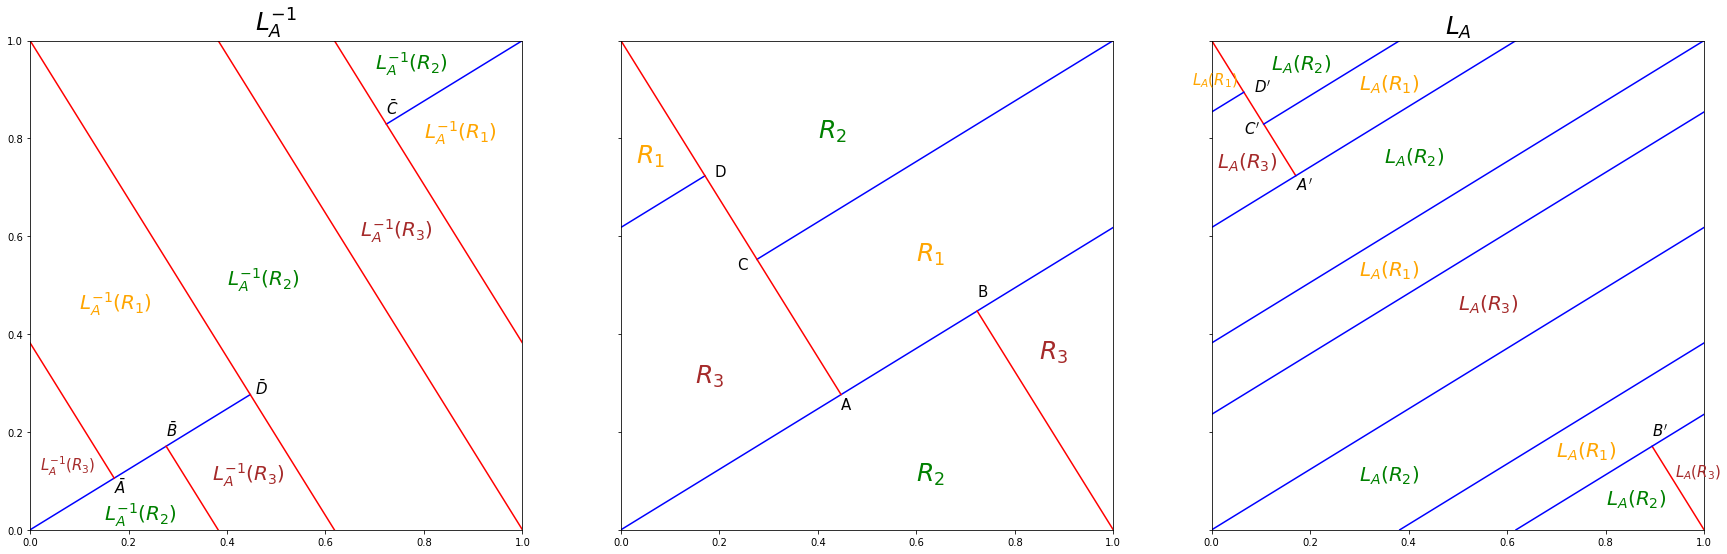

In [67]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True, figsize=(30, 9))
ax1.set(xlim=(0,1), ylim=(0,1))
ax1.set_title(r'$L_A^{-1}$', size=25)
ax3.set_title(r'$L_A$', size=25)

#crtanje particije
particija_arnoldove_macke(ax2, r_size=25, points_size=15)

#L_A
a=np.sqrt(5)
A=[a/5, (5-a)/10]
B=[(5+a)/10, a/5]
C=[(5-a)/10, (5-a)/5]
D=[(3*a-5)/10, (5+a)/10]
A_mat=np.array([[2,1], [1,1]])

#računanje slika od A, B, C i D
A1=np.matmul(A_mat, A)%1
B1=np.matmul(A_mat, B)%1
C1=np.matmul(A_mat, C)%1
D1=np.matmul(A_mat, D)%1

#pomoćne točke
k_u=(a-1)/2 #koeficijent smjera za pravac ekspanzije
E=[1, k_u*(1-B1[0])+B1[1]]
F=[-B1[1]/k_u+B1[0], 0]
G=[(1-A1[1])/k_u+A1[0], 1]
H=[0, 1-k_u*G[0]]
I=[(1-C1[1])/k_u+C1[0], 1]
J=[0, D1[1]-k_u*D1[0]]
K=[(1-C1[1])/k_u+C1[0], 0]
L=[1, k_u*(1-K[0])]
M=[0, k_u*(1-K[0])]
N=[1, k_u+M[1]]
O=[0, E[1]]
P=[1, k_u+O[1]]

#crtanje pravaca
ax3.plot([0, A1[0]], [1, A1[1]], color="red")
ax3.plot([1, B1[0]], [0, B1[1]], color="red")
ax3.plot([0,1], [0,(a-1)/2], color="blue")
ax3.plot([E[0], F[0]], [E[1], F[1]], color="blue")
ax3.plot([H[0], G[0]], [H[1], G[1]], color="blue")
ax3.plot([C1[0], I[0]], [C1[1], I[1]], color="blue")
ax3.plot([J[0], D1[0]], [J[1], D1[1]], color="blue")
ax3.plot([K[0], L[0]], [K[1], L[1]], color="blue")
ax3.plot([M[0], N[0]], [M[1], N[1]], color="blue")
ax3.plot([O[0], P[0]], [O[1], P[1]], color="blue")

#označavanje točaka A', B', C' i D'
ax3.text(A1[0], A1[1]-0.03, r"$A'$", size=15)
ax3.text(B1[0], B1[1]+0.02, r"$B'$", size=15)
ax3.text(C1[0]-0.04, C1[1]-0.02, r"$C'$", size=15)
ax3.text(D1[0]+0.02, D1[1], r"$D'$", size=15)

#označavanje slike particije 
ax3.text(0.3, 0.9, r'$L_A(R_1)$', size=20, color="orange")
ax3.text(0.7, 0.15, r'$L_A(R_1)$', size=20, color="orange")
ax3.text(0.3, 0.52, r'$L_A(R_1)$', size=20, color="orange")
ax3.text(-0.04, 0.91, r'$L_A(R_1)$', size=15, color="orange")

ax3.text(0.35, 0.75, r'$L_A(R_2)$', size=20, color="green")
ax3.text(0.3, 0.1, r'$L_A(R_2)$', size=20, color="green")
ax3.text(0.8, 0.05, r'$L_A(R_2)$', size=20, color="green")
ax3.text(0.12, 0.94, r'$L_A(R_2)$', size=20, color="green")

ax3.text(0.01, 0.74, r'$L_A(R_3)$', size=20, color="brown")
ax3.text(0.94, 0.11, r'$L_A(R_3)$', size=15, color="brown")
ax3.text(0.5, 0.45, r'$L_A(R_3)$', size=20, color="brown")


#L_A^{-1}
A_mat_inv=np.linalg.inv(A_mat)

#računanje praslika od A, B, C i D
A_1=np.matmul(A_mat_inv, A)%1
B_1=np.matmul(A_mat_inv, B)%1
C_1=np.matmul(A_mat_inv, C)%1
D_1=np.matmul(A_mat_inv, D)%1

#pomoćne točke
k_s=(1+a)/2 #abs. koeficijent smjera za pravac kontrakcije
E=[0, k_s*A_1[0]+A_1[1]]
F=[1, E[1]]
G=[1-(1-F[1])/k_s, 1]
H=[G[0], 0]
I=[0, k_s*H[0]]
J=[1-1/k_s, 1]
K=[J[0], 0]

#crtanje pravaca
ax1.plot([0, D_1[0]], [0, D_1[1]], color="blue")
ax1.plot([C_1[0], 1], [C_1[1], 1], color="blue")
ax1.plot([A_1[0], E[0]], [A_1[1], E[1]], color="red")
ax1.plot([F[0], G[0]], [F[1], G[1]], color="red")
ax1.plot([H[0], I[0]], [H[1], I[1]], color="red")
ax1.plot([1, J[0]], [0, J[1]], color="red")
ax1.plot([K[0], B_1[0]], [K[1], B_1[1]], color="red")

#označavanje točaka
ax1.text(A_1[0], A_1[1]-0.03, r"$\bar{A}$", size=15)
ax1.text(B_1[0], B_1[1]+0.02, r"$\bar{B}$", size=15)
ax1.text(C_1[0], C_1[1]+0.02, r"$\bar{C}$", size=15)
ax1.text(D_1[0]+0.01, D_1[1], r"$\bar{D}$", size=15)

#označavanje praslike particije
ax1.text(0.1, 0.45, r'$L_A^{-1}(R_1)$', size=20, color="orange")
ax1.text(0.8, 0.8, r'$L_A^{-1}(R_1)$', size=20, color="orange")

ax1.text(0.15, 0.02, r'$L_A^{-1}(R_2)$', size=20, color="green")
ax1.text(0.4, 0.5, r'$L_A^{-1}(R_2)$', size=20, color="green")
ax1.text(0.7, 0.94, r'$L_A^{-1}(R_2)$', size=20, color="green")

ax1.text(0.67, 0.6, r'$L_A^{-1}(R_3)$', size=20, color="brown")
ax1.text(0.37, 0.1, r'$L_A^{-1}(R_3)$', size=20, color="brown")
ax1.text(0.02, 0.12, r'$L_A^{-1}(R_3)$', size=15, color="brown")

Pogledajmo točke A, B, C, D i kako se kreću po pravcima. Na primjer, u particiji su A i B blizu, a u slici od particije je dio (plavog) pravca između njih nekoliko puta 'obišao' torus. S druge strane, vidimo da su se sve točke 'skupile' s obzirom na crveni pravac.  
Na slici praslike od particije vidimo upravo suprotno - zašto? Primijetimo prvo da $L_A^{-1}$ postoji jer je $detA\neq 0$ te da je dano matricom $A^{-1}$. Provjerom svojstava iz definicje 2., lako se vidi da je $L_A^{-1}$ isto hiperbolički automorfizam torusa. Njegove svojstvene vrijednosti su recipročne vrijednosti od $\lambda_s$ i $\lambda_u$ te sada analognim objašnjenem kao za $L_A$ dolazimo do pravaca ekspanzije i kontrakcije pa dobivamo da nam sada crveni pravac predstavlja pravac ekspanzije, a plavi kontrakcije.

Područje dinamičkih sustava dalje razvija ovu konstrukciju tako da za svaku točku gleda u koje pravokutnike upada s iteracijama $L_A$, ali to svakako nadilazi okvire ovog eseja.

Jedna zanimljivost za kraj: nakon 300 iteracija, opet dobivamo originalnu sliku mačke.

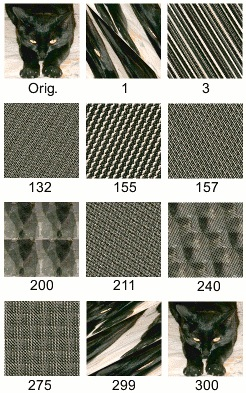

In [68]:
Image('macka_iteracije.jpg')

## Literatura

https://web.math.pmf.unizg.hr/~sonja/DDS.pdf  
https://www.researchgate.net/profile/Sophia_Potoczak/publication/304126129/figure/fig6/AS:380419355758594@1467710450215/The-construction-of-a-torus-from-the-unit-square.png  
https://i.stack.imgur.com/Qm7p8.jpg  
https://upload.wikimedia.org/wikipedia/commons/a/ae/Arnoldcatmap.svg  
https://lh3.googleusercontent.com/proxy/mHxr52YpJSGqhs8hqmEDLlNBjjvBvww5yGjYAjEJIVsxUj7Ew5PBQ5GE-ux_opNYLEFYPlTpWNikhT_6MQBPu74NMBxBdj5uvqgnrh5bPDTPL4a3ofjOHTRVVGk  